<a href="https://colab.research.google.com/github/IMPRIME17/Deep-learning-Projects/blob/master/Hand-written%20Digit%20Recognation/Hand_Written_digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [0]:
np.random.seed(0)

In [0]:
data = mnist.load_data()

In [4]:
len(data[0])

2

In [0]:
(X_train, y_train),(X_test, y_test) = data

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

8

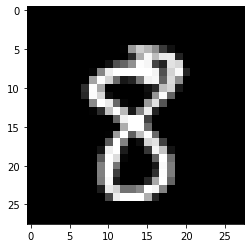

In [8]:
test_rand = np.random.randint(2,100)
plt.imshow(X_train[test_rand],cmap= 'gray')
y_train[test_rand]

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2 152 203 181 141  58
   17   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  40 172 247 188 232
  234  35   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17  82 101 143 252 245  67  35
  225 214   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5 132 237 254 254 254 254 25

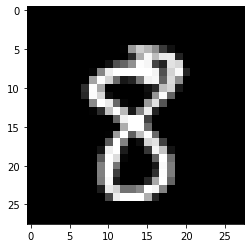

In [10]:
plt.imshow(X_train[test_rand],cmap= 'gray')
print(X_train[test_rand])

In [0]:
num_of_samples=[]
cols = 5
num_classes = 10

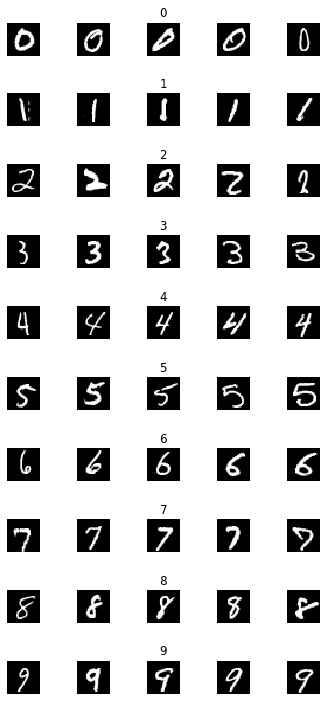

In [12]:
fig, axs = plt.subplots(nrows= num_classes, ncols=cols, figsize= (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train== j]
    axs[j][i].imshow(x_selected[np.random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


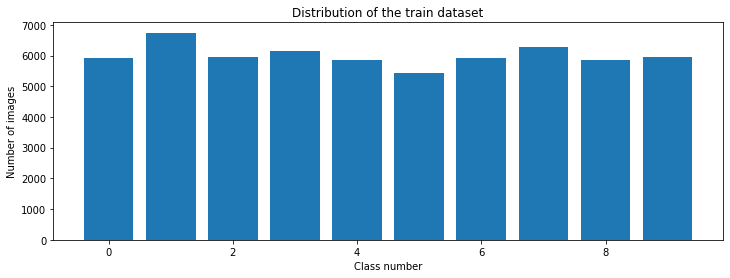

In [13]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

## Preprocessing the Data
 Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train.max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255

 Reshapeing the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(-1, 28, 28,1)
X_train.shape

(60000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28)

In [0]:
X_test= X_test.reshape(-1, 28, 28,1)

In [20]:
X_train.shape

(60000, 28, 28, 1)

 Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [0]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [22]:
y_cat_train.shape

(60000, 10)

In [23]:
y_test.shape

(10000,)

# Building the Model

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

In [25]:
lenet = le_net()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [26]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [27]:
history= lenet.fit(X_train,y_cat_train, epochs=20, validation_split= 0.1, batch_size=400,verbose=1,shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/20





54000/54000 [==============================] - 3s 62us/step - loss: 0.5941 - acc: 0.8114 - val_loss: 0.0986 - val_acc: 0.9745
Epoch 2/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.1588 - acc: 0.9525 - val_loss: 0.0726 - val_acc: 0.9808
Epoch 3/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.1142 - acc: 0.9663 - val_loss: 0.0555 - val_acc: 0.9838
Epoch 4/20
54000/54000 [==============================] - 1s 18us/step - loss: 0.0930 - acc: 0.9722 - val_loss: 0.0532 - val_acc: 0.9857
Epoch 5/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.0820 - acc: 0.9756 - val_loss: 0.0441 - val_acc: 0.9873
Epoch 6/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.0709 - acc: 0.9784 - val_loss: 0.0404 - val_acc: 0.9898
Epoch 7/20
54000/54000 [===

### Evaluating the Model

**TASK 7: Showing the accuracy,precision,recall,f1-score the model achieved on the X_test data set.

Text(0.5, 0, 'epoch')

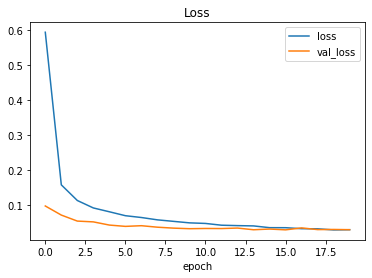

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

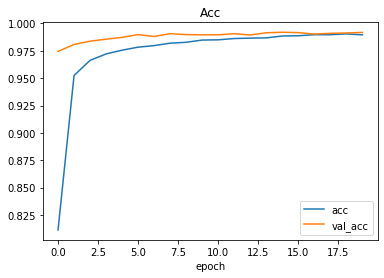

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Acc')
plt.xlabel('epoch')


In [30]:
lenet.metrics_names

['loss', 'acc']

In [0]:
y_cat_test = to_categorical(y_test)

In [32]:
lenet.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 1s 51us/step


[0.021508243732967548, 0.9927]

In [0]:
from sklearn.metrics import classification_report

In [0]:
y_predict = lenet.predict_classes(X_test)

In [35]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
lenet.save('digit.h5')

In [39]:
!ls

digit.h5  drive  sample_data


In [0]:
from google.colab import files

In [0]:
files.download('digit.h5')

# Testing the Model

predicted number is  7



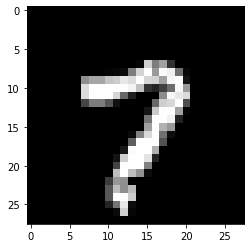

In [80]:
rand_num = np.random.randint(0,10000)
test_img = X_test[rand_num]
test_img= test_img.reshape(1,28,28,1)
print('predicted number is', lenet.predict_classes(test_img)[0])
print()

# checking the predicted num imgage
test_img= test_img.reshape(28,28)
plt.imshow(test_img, cmap='gray')

# Testing Hand-written Number Imgage form External Source

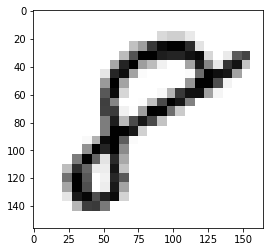

In [83]:
import requests
from PIL import Image
url = "https://kx.com/images/03_IMAGES/160520-8.png"
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert("L")
plt.imshow(img,cmap="gray")

In [0]:
img_array = np.asarray(img)
# resizing to (28,28) img
res = cv2.resize(img_array,(28,28))


In [85]:
# pre-processing the Image
res = res/255
res = res.reshape(1,28,28,1)

# prdiction

print('predicted number is', lenet.predict_classes(res)[0])


predicted number is 8
